Using the pennylane in-built functions to transform the quantum circuit. 

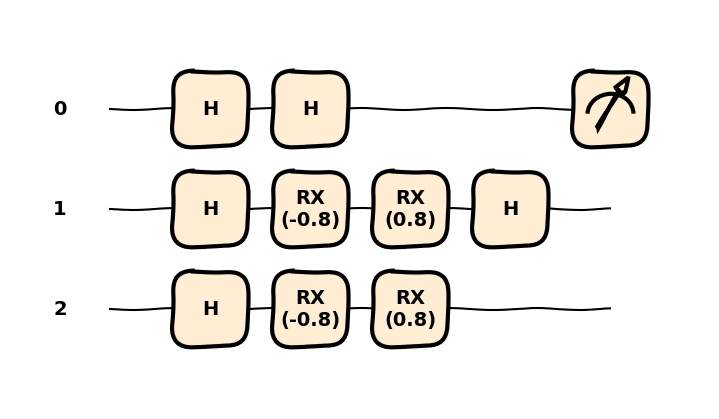

In [59]:
import pennylane as pl
import matplotlib.pyplot as plt 
import numpy as np 

device = pl.device('default.qubit', wires=3)

def circuit():
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.RX(phi=-np.pi/4, wires=1)
    pl.RX(phi=np.pi/4, wires=1)
    pl.Hadamard(wires=1)

    pl.RX(phi=-np.pi/4, wires=2)
    
    pl.RX(phi=np.pi/4, wires=2)

    return pl.expval(pl.PauliZ(wires=0))

qnode = pl.QNode(circuit, device)
pl.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()

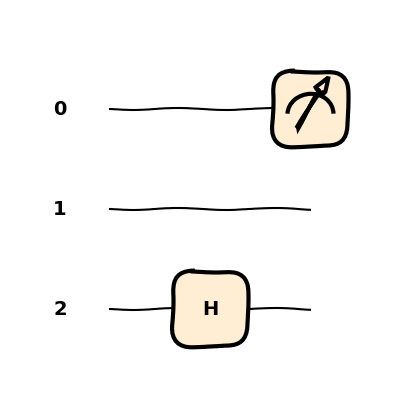

In [60]:
merge_rotations = pl.transforms.merge_rotations(atol=1e-9, include_gates=None)(circuit)
inverse_cancelled_circuit = pl.transforms.cancel_inverses(merge_rotations)
qnode = pl.QNode(inverse_cancelled_circuit, device)
pl.draw_mpl(qnode, decimals=1, style="sketch", show_all_wires=True)()
plt.show()

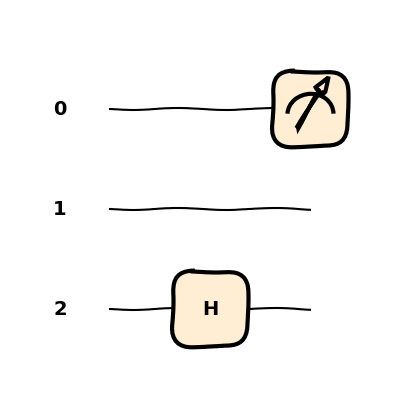

In [61]:
import pennylane as pn
import matplotlib.pyplot as plt 

device = pn.device('default.qubit', wires=3)

@pn.qnode(device)
@pn.transforms.cancel_inverses
@pn.transforms.merge_rotations(atol=1e-9, include_gates=None)
def circuit():
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.RX(phi=-np.pi/4, wires=1)
    pl.RX(phi=np.pi/4, wires=1)
    pl.Hadamard(wires=1)
    pl.RX(phi=-np.pi/4, wires=2)
    pl.RX(phi=np.pi/4, wires=2)

    return pl.expval(pl.PauliZ(wires=0))

qml.draw_mpl(circuit, decimals=1, style="sketch", show_all_wires=True)()
plt.show()